En este notebook se analizan algunas opciones para la elección de un modelo a la hora de realizar una predicción en el rango de posiciones que un equipo podría quedar en función de sus carasteristicas y de las propias de la competición.


   * [1 Importacion de los datos<b>](#1)
   
   * [2. Primera Aproximacion - Kfold<b>](#2)
      * [2.1 Arboles de decisión - Kfold</b>](#3)
      * [2.2 LogisticRegression - Kfold</b>](#4)
      * [2.3 Random Forest - Kfold</b>](#5)
      * [2.4 k-nearest neighbors - Kfold</b>](#6)
      * [2.5 Support Vector Machines - Kfold</b>](#7) 
   * [3. Elección del modelo<b>](#8)
    





In [2]:
# Importación de librerias que se van a utilizar:

import pandas as pd
import numpy as np

import seaborn as sn
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



from sklearn.model_selection import KFold

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
import warnings
warnings.simplefilter("ignore")

   <a id=1></a>
**<h2>1 Importacion de los datos</h2>**

In [4]:
%cd C:\Users\Víctor Galán Alcón\Desktop\ENTREGA_1_SEPTIEMBRE\Data\dataModel
    
modelo = pd.read_csv("model.csv", index_col = 0)
modelo.shape

C:\Users\Víctor Galán Alcón\Desktop\ENTREGA_1_SEPTIEMBRE\Data\dataModel


(151217, 44)

In [5]:
modelo.head()

,totalAveragePublicScore,Featured,Playground,Recruitment,Research,masters,totalStaff,totalMaster,totalExpert,totalContributor,...,Mean Absolute Error (MAE),Mean Average Precision (MAP),Normalized Gini Index,QuadraticWeightedKappa,Root Mean Square Percentage Error (RMSPE),Root Mean Squared Error (RMSE),Root Mean Squared Logarithmic Error (RMSLE),approximate median significance (AMS),rankPublic,PositionRanked
0,0.389967,1,0,0,0,0,0,88,239,127,...,0,0,0,0,0,0,0,0,209,200
1,0.389967,1,0,0,0,0,0,89,237,127,...,0,0,0,0,0,0,0,0,253,140
2,0.389967,1,0,0,0,0,0,89,239,127,...,0,0,0,0,0,0,0,0,727,200
3,0.389967,1,0,0,0,0,0,89,239,127,...,0,0,0,0,0,0,0,0,265,50
4,0.389967,1,0,0,0,0,0,89,239,127,...,0,0,0,0,0,0,0,0,129,200


In [6]:
X = modelo.drop(columns = ["PositionRanked"])
y = modelo.PositionRanked

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

   <a id=2></a>
**<h2>2 Primeta Aproximacion - Kfold</h2>**

   <a id=3></a>
**<h3>2.1 Arboles de decisión - Kfold</h3>**

In [8]:
score_mean_tree = []
precision_tree = []
recall_tree = []

a = 3

for d in range(15):

    kfold = KFold(n_splits = a,shuffle=True)
    
    
    cv_score_mean =[]
    cv_precision_mean = []
    cv_recall_mean = []

    n = 2

    for number in range(30):
        
            tree = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = n,
                                  random_state = 0)


            cv_score =[]
            cv_precision = []
            cv_recall = []

            i=1

            for train_index,test_index in kfold.split(X,y):

                xtr,xvl = X[train_index],X[test_index]
                ytr,yvl = y[train_index],y[test_index]

                tree.fit(xtr,ytr)

                score = accuracy_score(yvl,tree.predict(xvl))
                precision = precision_score(yvl, tree.predict(xvl), average = 'macro')
                recall = recall_score(yvl, tree.predict(xvl), average = 'macro')

                cv_score.append(score)
                cv_precision.append(precision)
                cv_recall.append(recall)


                i+=1

           
            n +=1
            
            score_mean = np.mean(cv_score)
            precision_mean = np.mean(cv_precision)
            recall_mean = np.mean(cv_recall)

            cv_score_mean.append(score_mean)
            cv_precision_mean.append(precision_mean)
            cv_recall_mean.append(recall_mean)           
            
    a +=2 
            
    score_mean_tree.append(cv_score_mean)
    precision_tree.append(cv_precision_mean)
    recall_tree.append(cv_recall_mean)

In [37]:
score_mean_tree_df = pd.DataFrame(score_mean_tree, columns = c, index = kfold ) 
score_mean_tree_df.to_csv("score_mean_tree_df.csv")
score_mean_tree_df

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
CV 2,0.857410,0.864718,0.877547,0.891732,0.895547,0.897717,0.900091,0.900461,0.900263,0.898252,...,0.878929,0.879418,0.879584,0.879716,0.880668,0.879808,0.880424,0.879127,0.879861,0.879028
CV 3,0.857152,0.865227,0.877725,0.891639,0.895686,0.898814,0.899978,0.900673,0.901142,0.899938,...,0.880695,0.881237,0.880285,0.881568,0.880807,0.881495,0.881905,0.880919,0.880503,0.881078
CV 5,0.857185,0.865128,0.878195,0.891871,0.895700,0.898794,0.900342,0.901565,0.901016,0.900441,...,0.881184,0.880741,0.881058,0.881713,0.881343,0.881435,0.881799,0.881422,0.881945,0.881277
CV 7,0.857166,0.864843,0.877778,0.892129,0.895964,0.898861,0.900725,0.900990,0.901790,0.901056,...,0.881568,0.882057,0.882163,0.881640,0.881911,0.881534,0.881640,0.881376,0.881892,0.881515
CV 9,0.857132,0.865088,0.877831,0.891824,0.895845,0.899085,0.900177,0.901135,0.901823,0.900719,...,0.881898,0.882189,0.881224,0.882070,0.881753,0.882414,0.880781,0.881938,0.881614,0.881746
CV 11,0.857146,0.864956,0.878069,0.891937,0.895640,0.899079,0.900415,0.900739,0.901784,0.901175,...,0.882672,0.881839,0.880834,0.881872,0.881495,0.882130,0.882255,0.881660,0.881058,0.882050
CV 13,0.857126,0.864989,0.878135,0.891844,0.896024,0.898980,0.900527,0.900944,0.901777,0.900831,...,0.881759,0.882302,0.881607,0.881700,0.881766,0.881210,0.882249,0.881799,0.881376,0.881825
CV 15,0.857119,0.865009,0.878056,0.891824,0.895766,0.898993,0.900375,0.901347,0.901493,0.901102,...,0.881971,0.881925,0.882222,0.881984,0.882507,0.881852,0.881455,0.881528,0.882090,0.882097
CV 17,0.857159,0.864790,0.878096,0.891798,0.895832,0.899059,0.900520,0.901340,0.901942,0.901459,...,0.882328,0.881786,0.882163,0.882050,0.882712,0.882169,0.881396,0.881845,0.882288,0.882037
CV 21,0.857172,0.864982,0.877963,0.891891,0.896275,0.899350,0.900163,0.901387,0.901989,0.900851,...,0.882229,0.881733,0.882560,0.882758,0.881759,0.882679,0.881911,0.881779,0.882044,0.881799


In [38]:
precision_tree_df = pd.DataFrame(precision_tree, columns = c, index = kfold ) 
precision_tree_df.to_csv("precision_tree_df.csv")
precision_tree_df

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
CV 2,0.066754,0.106649,0.208413,0.389393,0.478543,0.507678,0.505599,0.506619,0.504742,0.483769,...,0.384184,0.386993,0.387387,0.389087,0.393449,0.389838,0.391101,0.386030,0.389809,0.384496
CV 3,0.066485,0.107275,0.206632,0.391659,0.482087,0.516929,0.510622,0.509021,0.506898,0.495296,...,0.395175,0.394703,0.390868,0.395890,0.392653,0.397852,0.399121,0.393397,0.390001,0.394541
CV 5,0.066506,0.106458,0.208132,0.393855,0.473528,0.514518,0.514435,0.514777,0.512456,0.498989,...,0.394002,0.392397,0.394139,0.399796,0.393478,0.397216,0.398039,0.397354,0.399575,0.396609
CV 7,0.066473,0.104989,0.206255,0.392369,0.472105,0.517752,0.514305,0.514283,0.511756,0.504110,...,0.396867,0.400332,0.399452,0.398381,0.397589,0.394970,0.398194,0.395649,0.400548,0.397709
CV 9,0.066456,0.107076,0.205441,0.389751,0.472741,0.518610,0.508762,0.511761,0.513204,0.499158,...,0.399413,0.397723,0.394789,0.398974,0.397784,0.400629,0.393106,0.398469,0.394835,0.398660
CV 11,0.066461,0.106530,0.207556,0.392066,0.474447,0.519111,0.510959,0.511946,0.513034,0.503931,...,0.402095,0.397815,0.395230,0.397070,0.398265,0.398816,0.402005,0.396684,0.394671,0.399950
CV 13,0.066451,0.107007,0.207647,0.393805,0.472588,0.517668,0.510099,0.512438,0.512247,0.500386,...,0.397716,0.401619,0.396523,0.397781,0.397929,0.396445,0.401367,0.397138,0.397071,0.399665
CV 15,0.066489,0.106969,0.207561,0.395470,0.469637,0.518673,0.510478,0.515776,0.512953,0.502463,...,0.400966,0.399717,0.398728,0.398212,0.400633,0.398538,0.396567,0.395982,0.400408,0.398741
CV 17,0.066465,0.106548,0.207782,0.390489,0.473395,0.516381,0.510715,0.513251,0.518643,0.506926,...,0.400509,0.398221,0.398152,0.398906,0.402727,0.399153,0.396470,0.398982,0.401046,0.400992
CV 21,0.066474,0.106965,0.207321,0.390114,0.471475,0.521888,0.508790,0.514547,0.514991,0.501978,...,0.401355,0.396820,0.402130,0.403186,0.400032,0.400951,0.397913,0.397736,0.398834,0.397411


In [39]:
recall_tree_df = pd.DataFrame(recall_tree, columns = c, index = kfold ) 
recall_tree_df.to_csv("recall_tree_df.csv")
recall_tree_df

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
CV 2,0.120176,0.201544,0.280728,0.393638,0.401201,0.406299,0.421211,0.421623,0.426058,0.422488,...,0.386514,0.391871,0.390856,0.394351,0.397208,0.393605,0.396387,0.389804,0.392685,0.390061
CV 3,0.120230,0.202288,0.277024,0.395294,0.410420,0.407584,0.418062,0.421264,0.427276,0.426782,...,0.398326,0.399035,0.394839,0.399851,0.396419,0.401989,0.403252,0.398239,0.394671,0.399874
CV 5,0.120166,0.201542,0.279301,0.401359,0.405500,0.409461,0.416121,0.422929,0.423841,0.425192,...,0.397182,0.396069,0.397596,0.405128,0.396613,0.401584,0.401644,0.402098,0.402881,0.401328
CV 7,0.120196,0.197798,0.278013,0.396571,0.401386,0.408052,0.419311,0.421506,0.428919,0.424322,...,0.400352,0.404960,0.403832,0.401975,0.402209,0.397973,0.402671,0.400492,0.403055,0.401659
CV 9,0.120247,0.201360,0.276871,0.393143,0.404337,0.407227,0.417365,0.420741,0.426741,0.426999,...,0.403129,0.401458,0.398009,0.403658,0.401922,0.403458,0.397024,0.401941,0.399298,0.402316
CV 11,0.120194,0.201861,0.278580,0.395796,0.405512,0.407828,0.417979,0.419441,0.428467,0.428105,...,0.408071,0.402860,0.400481,0.401233,0.402449,0.401155,0.405879,0.401210,0.399051,0.404181
CV 13,0.120268,0.202394,0.278945,0.401120,0.401762,0.407036,0.418960,0.420300,0.425217,0.428006,...,0.402548,0.405634,0.403509,0.402176,0.401778,0.401084,0.406104,0.399185,0.401981,0.403589
CV 15,0.120176,0.201184,0.279003,0.402153,0.402227,0.408019,0.419984,0.421819,0.425443,0.427309,...,0.405946,0.403866,0.401100,0.402678,0.405622,0.402085,0.401105,0.400163,0.405034,0.402229
CV 17,0.120148,0.201816,0.278854,0.393706,0.401986,0.407032,0.418793,0.423750,0.426299,0.428595,...,0.404564,0.401501,0.402048,0.403065,0.406954,0.402662,0.400506,0.402780,0.404972,0.405759
CV 21,0.120138,0.201682,0.278231,0.394098,0.400658,0.408482,0.417513,0.422472,0.425539,0.428481,...,0.405276,0.401645,0.405841,0.407125,0.404177,0.405798,0.401728,0.401957,0.402615,0.401608


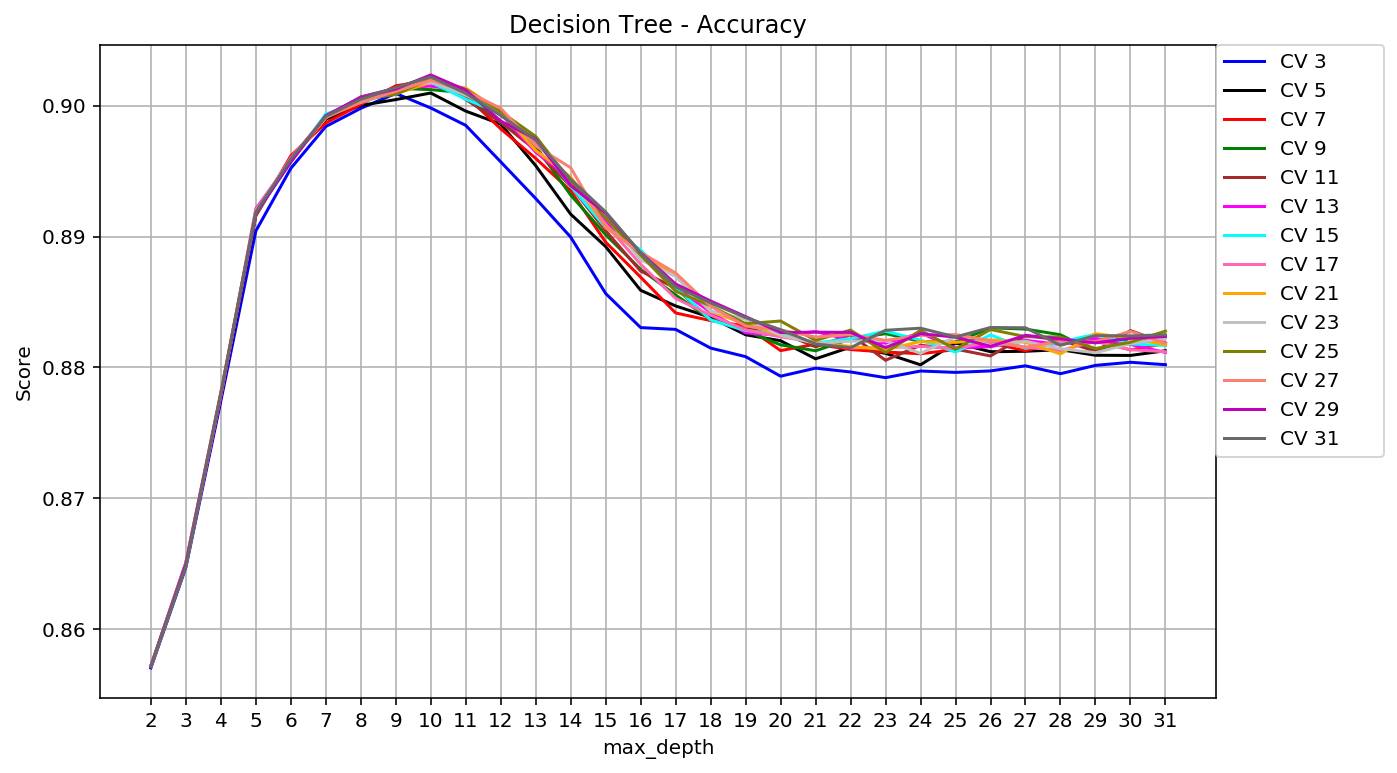

In [16]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,score_mean_tree[0], color = 'Blue', label = 'CV 3')
ax.plot(c,score_mean_tree[1], color = 'Black', label = 'CV 5')
ax.plot(c,score_mean_tree[2], color = 'Red', label = 'CV 7')
ax.plot(c,score_mean_tree[3], color = 'Green', label = 'CV 9')
ax.plot(c,score_mean_tree[4], color = 'Brown', label = 'CV 11')
ax.plot(c,score_mean_tree[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,score_mean_tree[6], color = 'cyan', label = 'CV 15')
ax.plot(c,score_mean_tree[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,score_mean_tree[8], color = 'orange', label = 'CV 21')
ax.plot(c,score_mean_tree[9], color = 'silver', label = 'CV 23')
ax.plot(c,score_mean_tree[10], color = 'olive', label = 'CV 25')
ax.plot(c,score_mean_tree[11], color = 'salmon', label = 'CV 27')
ax.plot(c,score_mean_tree[12], color = 'm', label = 'CV 29')
ax.plot(c,score_mean_tree[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Decision Tree - Accuracy')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

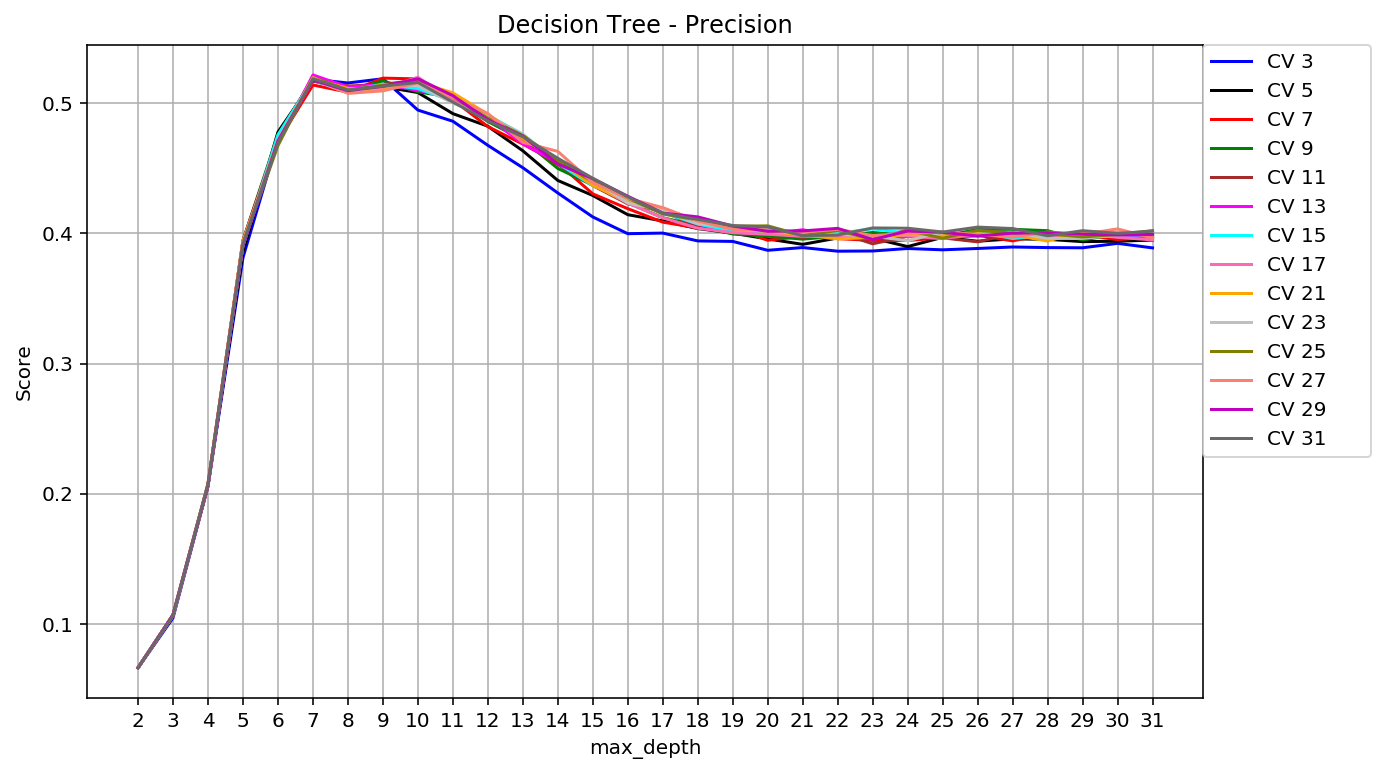

In [17]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,precision_tree[0], color = 'Blue', label = 'CV 3')
ax.plot(c,precision_tree[1], color = 'Black', label = 'CV 5')
ax.plot(c,precision_tree[2], color = 'Red', label = 'CV 7')
ax.plot(c,precision_tree[3], color = 'Green', label = 'CV 9')
ax.plot(c,precision_tree[4], color = 'Brown', label = 'CV 11')
ax.plot(c,precision_tree[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,precision_tree[6], color = 'cyan', label = 'CV 15')
ax.plot(c,precision_tree[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,precision_tree[8], color = 'orange', label = 'CV 21')
ax.plot(c,precision_tree[9], color = 'silver', label = 'CV 23')
ax.plot(c,precision_tree[10], color = 'olive', label = 'CV 25')
ax.plot(c,precision_tree[11], color = 'salmon', label = 'CV 27')
ax.plot(c,precision_tree[12], color = 'm', label = 'CV 29')
ax.plot(c,precision_tree[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Decision Tree - Precision')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

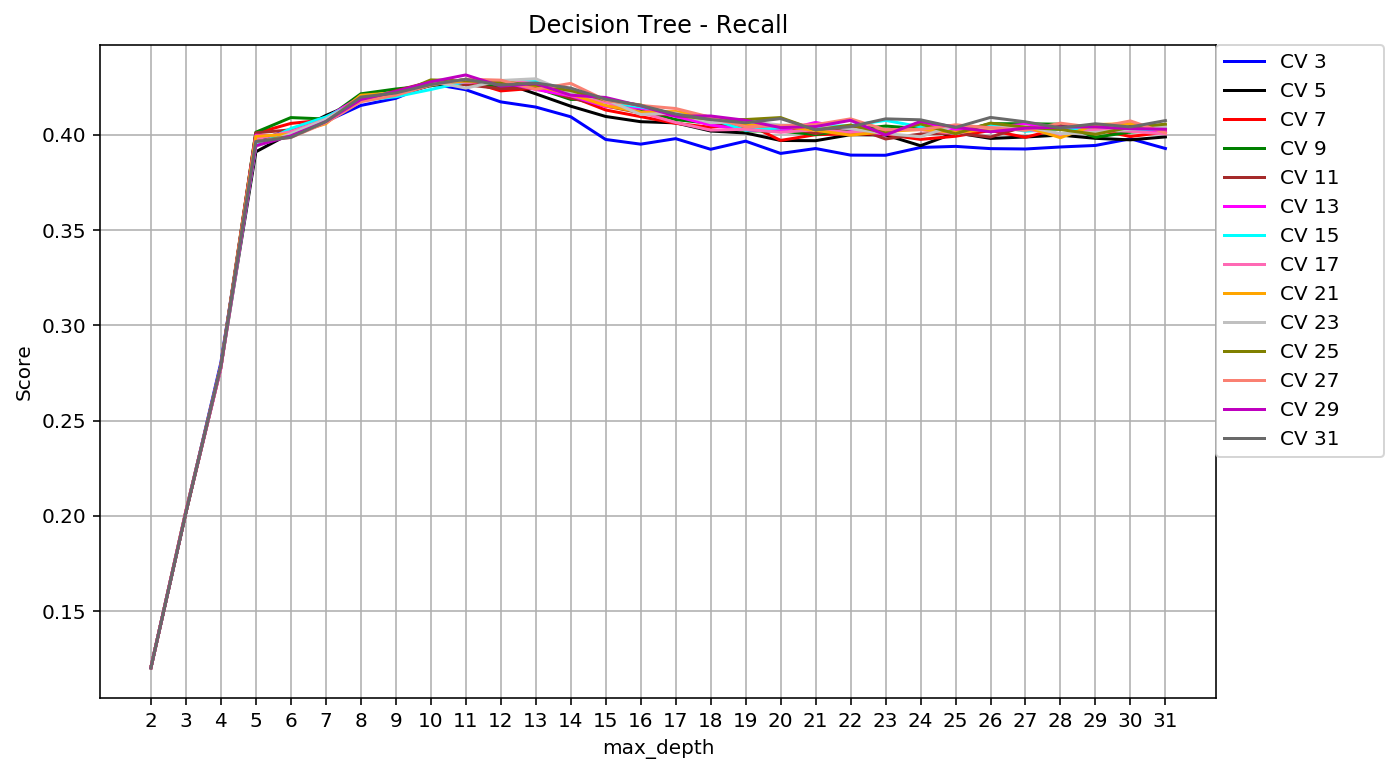

In [18]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,recall_tree[0], color = 'Blue', label = 'CV 3')
ax.plot(c,recall_tree[1], color = 'Black', label = 'CV 5')
ax.plot(c,recall_tree[2], color = 'Red', label = 'CV 7')
ax.plot(c,recall_tree[3], color = 'Green', label = 'CV 9')
ax.plot(c,recall_tree[4], color = 'Brown', label = 'CV 11')
ax.plot(c,recall_tree[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,recall_tree[6], color = 'cyan', label = 'CV 15')
ax.plot(c,recall_tree[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,recall_tree[8], color = 'orange', label = 'CV 21')
ax.plot(c,recall_tree[9], color = 'silver', label = 'CV 23')
ax.plot(c,recall_tree[10], color = 'olive', label = 'CV 25')
ax.plot(c,recall_tree[11], color = 'salmon', label = 'CV 27')
ax.plot(c,recall_tree[12], color = 'm', label = 'CV 29')
ax.plot(c,recall_tree[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Decision Tree - Recall')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

   <a id=4></a>
**<h3>2.2 LogisticRegression - Kfold</h3>**

In [9]:
cv_score_mean_lr =[]
cv_precision_mean_lr = []
cv_recall_mean_lr = []

n = 3

for a in range(15):
    
        
        lr= LogisticRegression()


        kf = KFold(n_splits=n+2,shuffle=True)

        cv_score =[]
        cv_precision = []
        cv_recall = []
        i=1

        for train_index,test_index in kf.split(X,y):

            xtr,xvl = X[train_index],X[test_index]
            ytr,yvl = y[train_index],y[test_index]

            lr.fit(xtr,ytr)
            score = accuracy_score(yvl,lr.predict(xvl))  
            precision = precision_score(yvl, lr.predict(xvl), average = 'macro')
            recall = recall_score(yvl, lr.predict(xvl), average = 'macro')

            cv_score.append(score)  
            cv_precision.append(precision)
            cv_recall.append(recall)

            i+=1
            
        n +=2 
        
        score_mean = np.mean(cv_score)
        precision_mean = np.mean(cv_precision)
        recall_mean = np.mean(cv_recall)
        
        cv_score_mean_lr.append(score_mean)  
        cv_precision_mean_lr.append(precision_mean)
        cv_recall_mean_lr.append(recall_mean)


In [40]:
cv_score_mean_lr_df = pd.DataFrame(cv_score_mean_lr,index = kfold ) 
cv_score_mean_lr_df.to_csv("cv_score_mean_lr_df.csv")
cv_score_mean_lr_df

,0
CV 2,0.855625
CV 3,0.855611
CV 5,0.855651
CV 7,0.855658
CV 9,0.855684
CV 11,0.855605
CV 13,0.855671
CV 15,0.855678
CV 17,0.855651
CV 21,0.855671


In [41]:
cv_precision_mean_lr_df = pd.DataFrame(cv_precision_mean_lr,index = kfold ) 
cv_precision_mean_lr_df.to_csv("cv_precision_mean_lr_df.csv")
cv_precision_mean_lr_df

,0
CV 2,0.116917
CV 3,0.115901
CV 5,0.105625
CV 7,0.111325
CV 9,0.114242
CV 11,0.106037
CV 13,0.104637
CV 15,0.110303
CV 17,0.109649
CV 21,0.104161


In [42]:
cv_precision_mean_lr_df = pd.DataFrame(cv_precision_mean_lr,index = kfold ) 
cv_precision_mean_lr_df.to_csv("cv_precision_mean_lr_df.csv")
cv_precision_mean_lr_df

,0
CV 2,0.116917
CV 3,0.115901
CV 5,0.105625
CV 7,0.111325
CV 9,0.114242
CV 11,0.106037
CV 13,0.104637
CV 15,0.110303
CV 17,0.109649
CV 21,0.104161


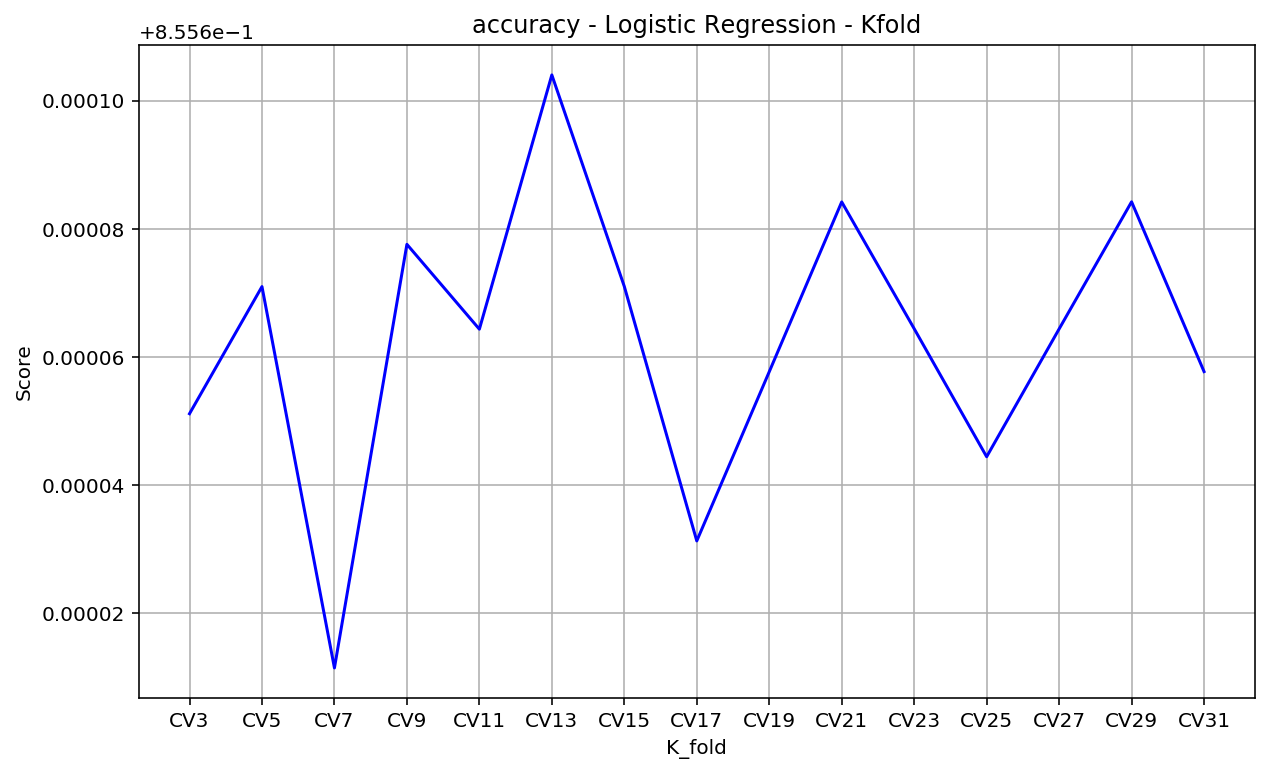

In [104]:
fig, ax = plt.subplots()

c = ["CV3","CV5","CV7","CV9","CV11","CV13","CV15","CV17","CV19","CV21","CV23","CV25","CV27","CV29","CV31"]

ax.plot(c,cv_score_mean_lr, color = 'Blue')



plt.xlabel('K_fold')
plt.ylabel('Score')
plt.title('accuracy - Logistic Regression - Kfold')


plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

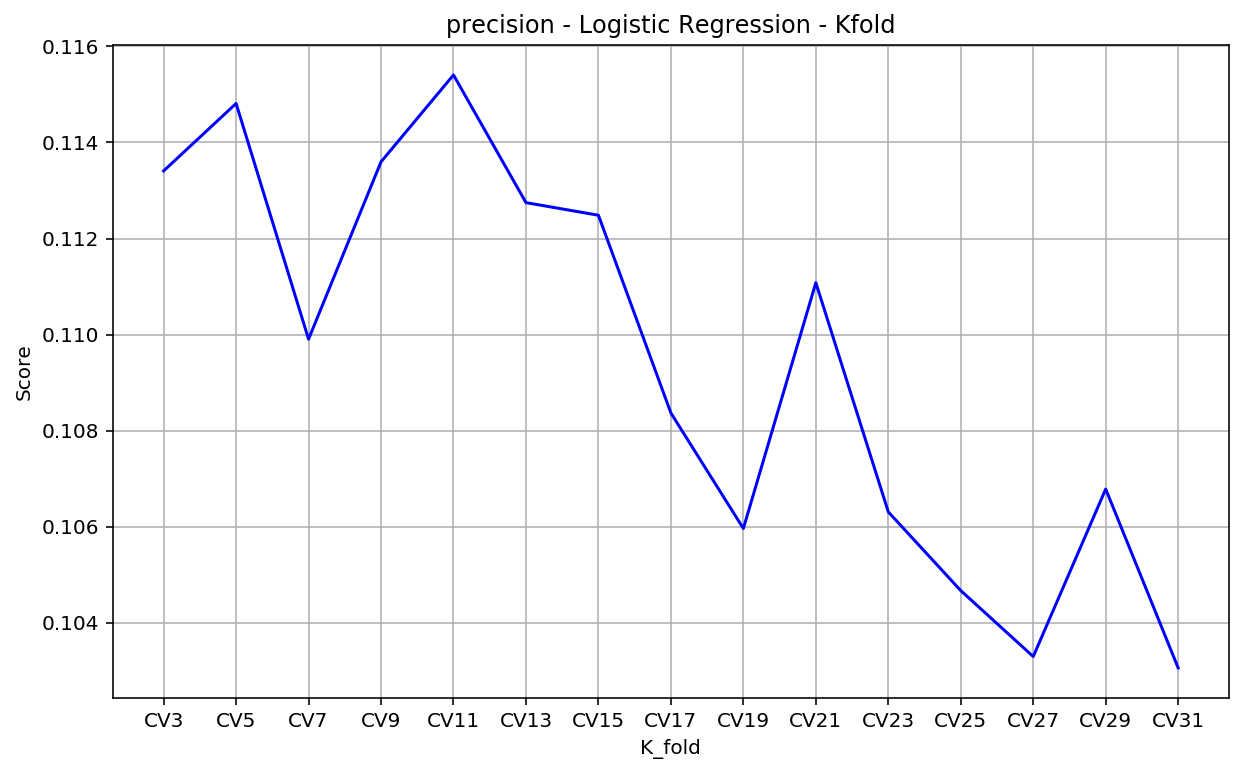

In [108]:
fig, ax = plt.subplots()

c = ["CV3","CV5","CV7","CV9","CV11","CV13","CV15","CV17","CV19","CV21","CV23","CV25","CV27","CV29","CV31"]

ax.plot(c,cv_precision_mean_lr, color = 'Blue')



plt.xlabel('K_fold')
plt.ylabel('Score')
plt.title('precision - Logistic Regression - Kfold')


plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

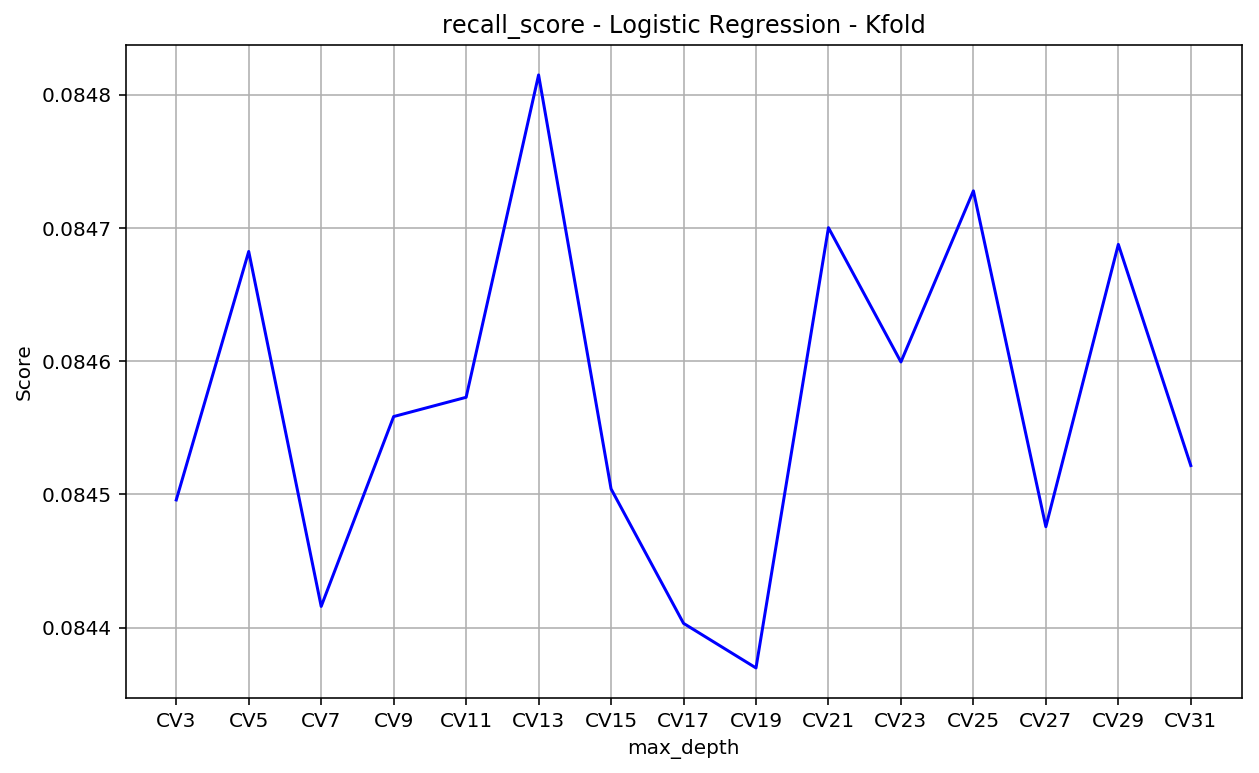

In [109]:
fig, ax = plt.subplots()

c = ["CV3","CV5","CV7","CV9","CV11","CV13","CV15","CV17","CV19","CV21","CV23","CV25","CV27","CV29","CV31"]

ax.plot(c,cv_recall_mean_lr, color = 'Blue')



plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('recall_score - Logistic Regression - Kfold')



plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

   <a id=5></a>
**<h3>2.3 Random Forest - Kfold</h3>**

In [10]:
score_mean_rf = []
precision_rf = []
recall_rf = []

a = 3

for d in range(15):

    kfold = KFold(n_splits = a,shuffle=True)
    
    
    cv_score_mean =[]
    cv_precision_mean = []
    cv_recall_mean = []

    n = 2

    for number in range(30):
        
            rf = RandomForestClassifier(n_estimators=n)


            cv_score =[]
            cv_precision = []
            cv_recall = []

            i=1

            for train_index,test_index in kfold.split(X,y):

                xtr,xvl = X[train_index],X[test_index]
                ytr,yvl = y[train_index],y[test_index]

                rf.fit(xtr,ytr)

                score = accuracy_score(yvl,rf.predict(xvl))
                precision = precision_score(yvl, rf.predict(xvl), average = 'macro')
                recall = recall_score(yvl, rf.predict(xvl), average = 'macro')

                cv_score.append(score)
                cv_precision.append(precision)
                cv_recall.append(recall)


                i+=1

           
            n +=1
            
            score_mean = np.mean(cv_score)
            precision_mean = np.mean(cv_precision)
            recall_mean = np.mean(cv_recall)

            cv_score_mean.append(score_mean)
            cv_precision_mean.append(precision_mean)
            cv_recall_mean.append(recall_mean)           
            
    a +=2 
            
    score_mean_rf.append(cv_score_mean)
    precision_rf.append(cv_precision_mean)
    recall_rf.append(cv_recall_mean)

In [34]:
score_mean_rf_df = pd.DataFrame(score_mean_rf, columns = c, index = kfold ) 
score_mean_rf_df.to_csv("score_mean_rf_df.csv")
score_mean_rf_df

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
CV 2,0.837783,0.863699,0.865505,0.867343,0.872852,0.872124,0.872957,0.874683,0.873784,0.873903,...,0.879967,0.877646,0.878281,0.877203,0.879491,0.879227,0.880767,0.879187,0.879762,0.878896
CV 3,0.838814,0.863865,0.865081,0.872342,0.870980,0.872435,0.874836,0.876528,0.875689,0.877659,...,0.880708,0.879861,0.881554,0.878955,0.880344,0.879808,0.880185,0.880384,0.880767,0.880695
CV 5,0.846710,0.863739,0.866417,0.870068,0.872534,0.873526,0.873837,0.874723,0.876039,0.876892,...,0.879055,0.880205,0.880027,0.879835,0.881455,0.880900,0.879742,0.881098,0.880972,0.880642
CV 7,0.842141,0.863005,0.867098,0.872190,0.872091,0.874637,0.875285,0.876052,0.876304,0.877421,...,0.880344,0.880080,0.879901,0.880754,0.880840,0.881581,0.881158,0.881693,0.880867,0.881270
CV 9,0.844482,0.863388,0.867211,0.870808,0.872250,0.875695,0.874088,0.876535,0.876978,0.878843,...,0.880999,0.880252,0.881151,0.881951,0.881878,0.882037,0.882302,0.881508,0.881296,0.881072
CV 11,0.841599,0.863388,0.867330,0.870808,0.872170,0.873301,0.875960,0.875801,0.877223,0.877666,...,0.880933,0.880800,0.880549,0.881554,0.880999,0.881197,0.879947,0.881462,0.882169,0.881032
CV 13,0.840282,0.863858,0.866212,0.871754,0.871509,0.874207,0.875358,0.876138,0.876310,0.878314,...,0.880298,0.881250,0.881594,0.881422,0.881005,0.883095,0.881772,0.881382,0.880926,0.881224
CV 15,0.841519,0.863355,0.866159,0.870444,0.873467,0.875530,0.875014,0.876324,0.877005,0.877613,...,0.880179,0.880364,0.880714,0.881349,0.881825,0.881396,0.881111,0.881680,0.881105,0.881435
CV 17,0.841182,0.864737,0.866635,0.871767,0.872905,0.874941,0.875001,0.875960,0.877262,0.878737,...,0.881310,0.880377,0.881323,0.880840,0.880602,0.880635,0.881435,0.881475,0.881025,0.881138
CV 21,0.840144,0.863534,0.867085,0.872382,0.872025,0.875305,0.875113,0.876535,0.878347,0.878063,...,0.880662,0.881561,0.880814,0.881111,0.881601,0.881885,0.881316,0.881534,0.882077,0.881700


In [35]:
precision_rf_df = pd.DataFrame(precision_rf, columns = c, index = kfold ) 
precision_rf_df.to_csv("precision_rf_df.csv")
precision_rf_df

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
CV 2,0.211762,0.262376,0.261351,0.265592,0.294825,0.282930,0.289328,0.298984,0.290833,0.289761,...,0.326640,0.312028,0.314516,0.307230,0.323900,0.322050,0.331361,0.319628,0.324967,0.319270
CV 3,0.214717,0.261366,0.261652,0.295254,0.285623,0.286618,0.302093,0.310069,0.308537,0.316016,...,0.332349,0.326826,0.337752,0.321236,0.328890,0.325792,0.327589,0.328958,0.331583,0.331574
CV 5,0.244445,0.259889,0.268834,0.279641,0.295095,0.294330,0.296380,0.298759,0.305558,0.312504,...,0.322904,0.329087,0.327147,0.326808,0.336462,0.334075,0.325092,0.334750,0.332973,0.331277
CV 7,0.227026,0.257133,0.274485,0.290122,0.292366,0.300539,0.305600,0.309260,0.309763,0.315465,...,0.331705,0.330540,0.327236,0.332708,0.332853,0.339045,0.335841,0.338935,0.334720,0.336617
CV 9,0.235379,0.258077,0.275263,0.285526,0.292649,0.308216,0.298129,0.311860,0.314634,0.323431,...,0.333633,0.330668,0.336253,0.341704,0.341735,0.339499,0.345062,0.338124,0.337615,0.334844
CV 11,0.223531,0.256872,0.276183,0.283248,0.294509,0.292460,0.312666,0.306330,0.316888,0.318793,...,0.335112,0.334130,0.332468,0.338988,0.335611,0.336746,0.327604,0.337067,0.340922,0.335116
CV 13,0.221712,0.255912,0.272464,0.289994,0.291584,0.298100,0.306436,0.308860,0.309092,0.321787,...,0.330400,0.336469,0.338727,0.336952,0.335592,0.348493,0.340432,0.336051,0.335060,0.336125
CV 15,0.227666,0.259697,0.265729,0.284321,0.300051,0.307750,0.303269,0.310887,0.313302,0.316453,...,0.329451,0.329501,0.334900,0.336946,0.338651,0.337397,0.335988,0.339748,0.335984,0.337581
CV 17,0.227188,0.264531,0.271650,0.290268,0.297538,0.304356,0.307987,0.306422,0.315159,0.324233,...,0.335736,0.331205,0.336417,0.334196,0.333090,0.332572,0.336176,0.338196,0.334532,0.335682
CV 21,0.224154,0.259985,0.275678,0.293959,0.292959,0.304093,0.304346,0.308641,0.323057,0.318572,...,0.332898,0.339989,0.334668,0.336215,0.340145,0.338969,0.336454,0.337166,0.341588,0.338801


In [36]:
recall_rf_df = pd.DataFrame(recall_rf, columns = c, index = kfold ) 
recall_rf_df.to_csv("recall_rf_df.csv")
recall_rf_df

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
CV 2,0.243304,0.257157,0.260378,0.252267,0.281391,0.267915,0.270460,0.275923,0.269676,0.265199,...,0.294039,0.280609,0.282981,0.275640,0.288504,0.288333,0.297210,0.286468,0.290197,0.284082
CV 3,0.248383,0.258158,0.258738,0.283039,0.271666,0.269781,0.281223,0.288236,0.286099,0.291462,...,0.298560,0.292881,0.303461,0.288684,0.293307,0.291793,0.293781,0.294140,0.296149,0.296146
CV 5,0.279354,0.256122,0.267239,0.268596,0.283531,0.277164,0.277874,0.278281,0.282351,0.287038,...,0.291034,0.295065,0.293017,0.293084,0.302263,0.299947,0.291966,0.298958,0.299024,0.296190
CV 7,0.261208,0.253569,0.271385,0.277636,0.278891,0.282239,0.287200,0.286854,0.287095,0.290029,...,0.298330,0.295926,0.294397,0.298527,0.300794,0.304375,0.299369,0.302951,0.298818,0.300340
CV 9,0.268772,0.254993,0.271027,0.272385,0.281082,0.290142,0.278512,0.289645,0.289738,0.297444,...,0.300849,0.297632,0.303006,0.305853,0.306739,0.303564,0.308418,0.302610,0.301579,0.299962
CV 11,0.256464,0.252837,0.273542,0.270900,0.281335,0.274573,0.291478,0.284078,0.292171,0.291606,...,0.301751,0.300336,0.298944,0.303681,0.300552,0.301067,0.293949,0.301653,0.305795,0.299916
CV 13,0.254902,0.254081,0.270049,0.279631,0.279026,0.280564,0.289268,0.286144,0.286939,0.296000,...,0.297641,0.302888,0.305648,0.301749,0.301018,0.312488,0.304774,0.301679,0.299873,0.300905
CV 15,0.262760,0.255528,0.262919,0.271561,0.285099,0.287706,0.285001,0.287756,0.289836,0.291332,...,0.298036,0.296944,0.300703,0.303299,0.304897,0.302862,0.300725,0.303228,0.300559,0.301823
CV 17,0.262362,0.260826,0.266429,0.280498,0.284863,0.286129,0.287829,0.285042,0.292475,0.297934,...,0.302163,0.298653,0.303368,0.299844,0.299540,0.297674,0.301908,0.302727,0.300093,0.301530
CV 21,0.258889,0.255374,0.270975,0.280604,0.278866,0.288014,0.285532,0.286079,0.298373,0.293835,...,0.300199,0.305777,0.300471,0.302384,0.304779,0.303609,0.301684,0.301676,0.305063,0.303188


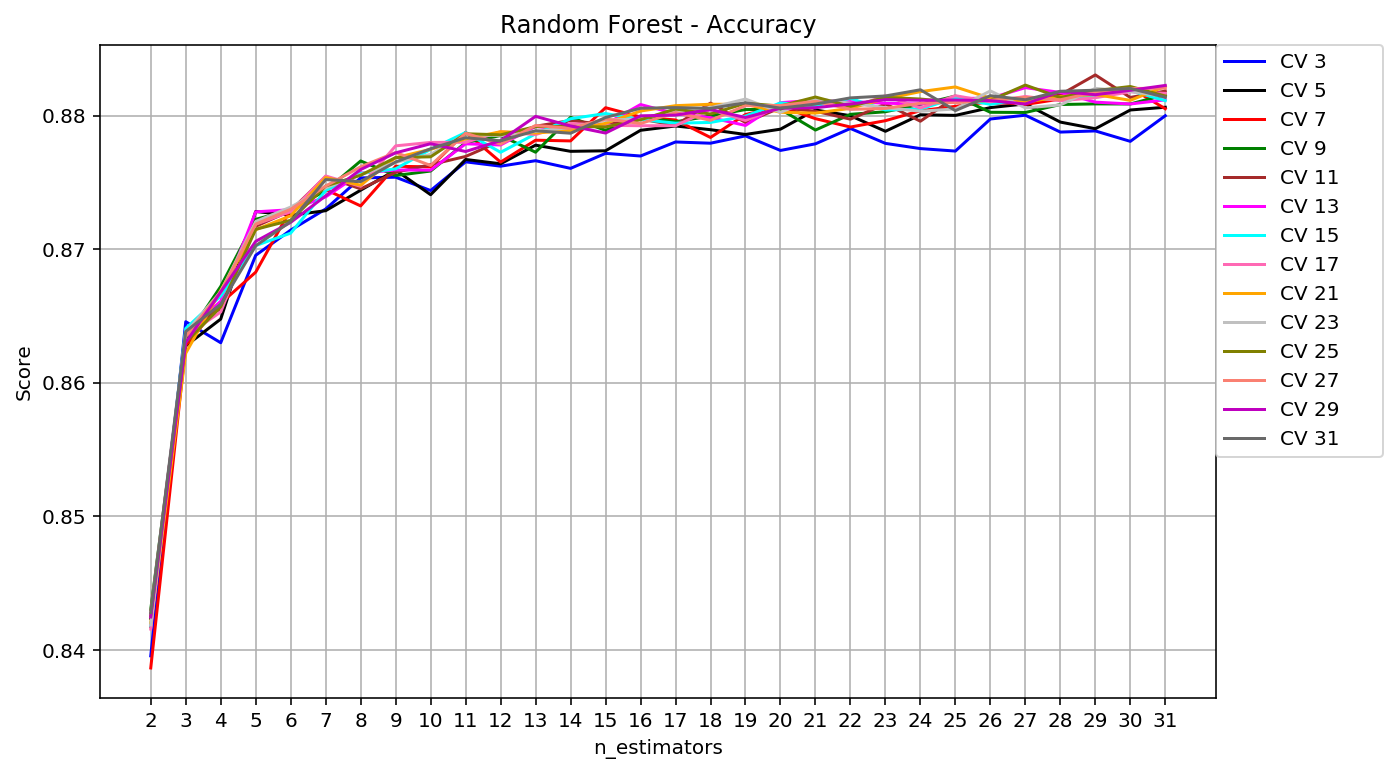

In [85]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,score_mean_rf[0], color = 'Blue', label = 'CV 3')
ax.plot(c,score_mean_rf[1], color = 'Black', label = 'CV 5')
ax.plot(c,score_mean_rf[2], color = 'Red', label = 'CV 7')
ax.plot(c,score_mean_rf[3], color = 'Green', label = 'CV 9')
ax.plot(c,score_mean_rf[4], color = 'Brown', label = 'CV 11')
ax.plot(c,score_mean_rf[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,score_mean_rf[6], color = 'cyan', label = 'CV 15')
ax.plot(c,score_mean_rf[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,score_mean_rf[8], color = 'orange', label = 'CV 21')
ax.plot(c,score_mean_rf[9], color = 'silver', label = 'CV 23')
ax.plot(c,score_mean_rf[10], color = 'olive', label = 'CV 25')
ax.plot(c,score_mean_rf[11], color = 'salmon', label = 'CV 27')
ax.plot(c,score_mean_rf[12], color = 'm', label = 'CV 29')
ax.plot(c,score_mean_rf[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Random Forest - Accuracy')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

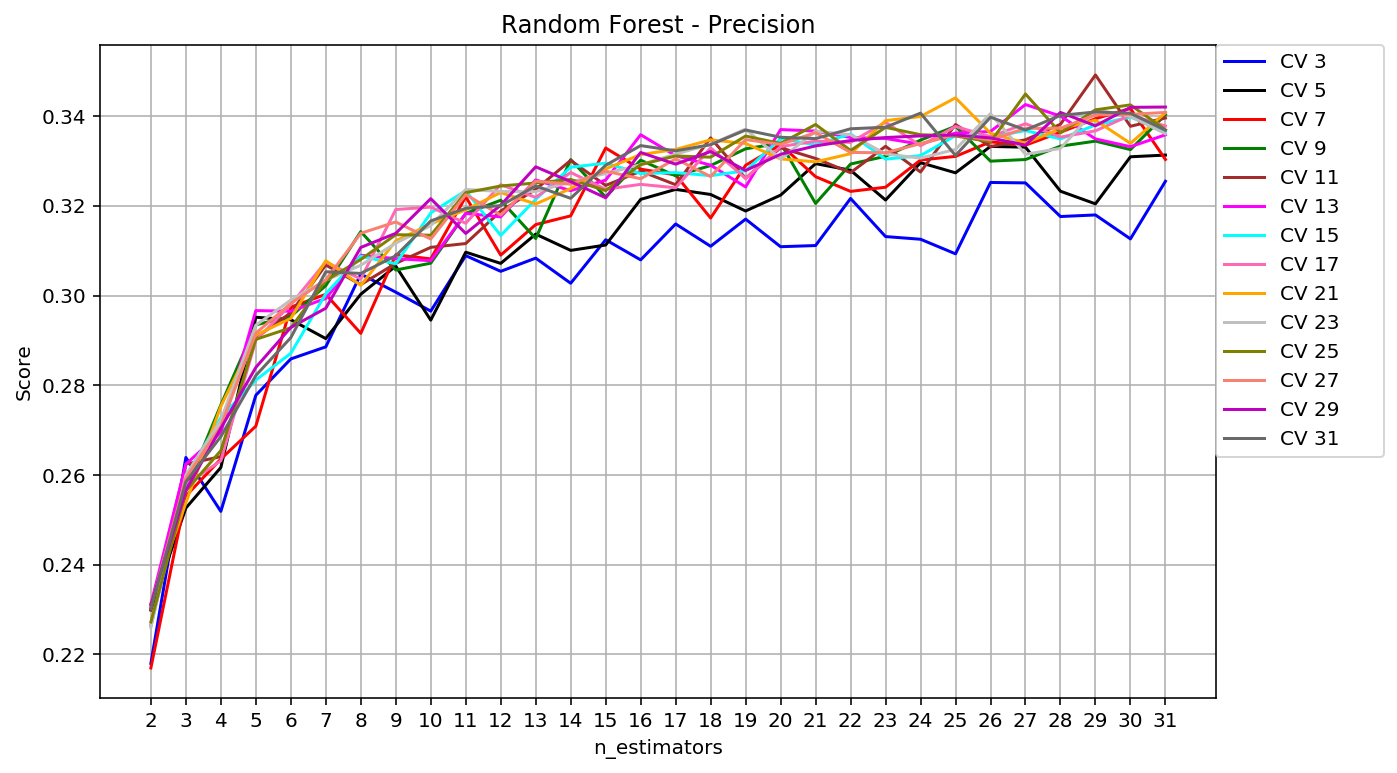

In [86]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,precision_rf[0], color = 'Blue', label = 'CV 3')
ax.plot(c,precision_rf[1], color = 'Black', label = 'CV 5')
ax.plot(c,precision_rf[2], color = 'Red', label = 'CV 7')
ax.plot(c,precision_rf[3], color = 'Green', label = 'CV 9')
ax.plot(c,precision_rf[4], color = 'Brown', label = 'CV 11')
ax.plot(c,precision_rf[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,precision_rf[6], color = 'cyan', label = 'CV 15')
ax.plot(c,precision_rf[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,precision_rf[8], color = 'orange', label = 'CV 21')
ax.plot(c,precision_rf[9], color = 'silver', label = 'CV 23')
ax.plot(c,precision_rf[10], color = 'olive', label = 'CV 25')
ax.plot(c,precision_rf[11], color = 'salmon', label = 'CV 27')
ax.plot(c,precision_rf[12], color = 'm', label = 'CV 29')
ax.plot(c,precision_rf[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Random Forest - Precision')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

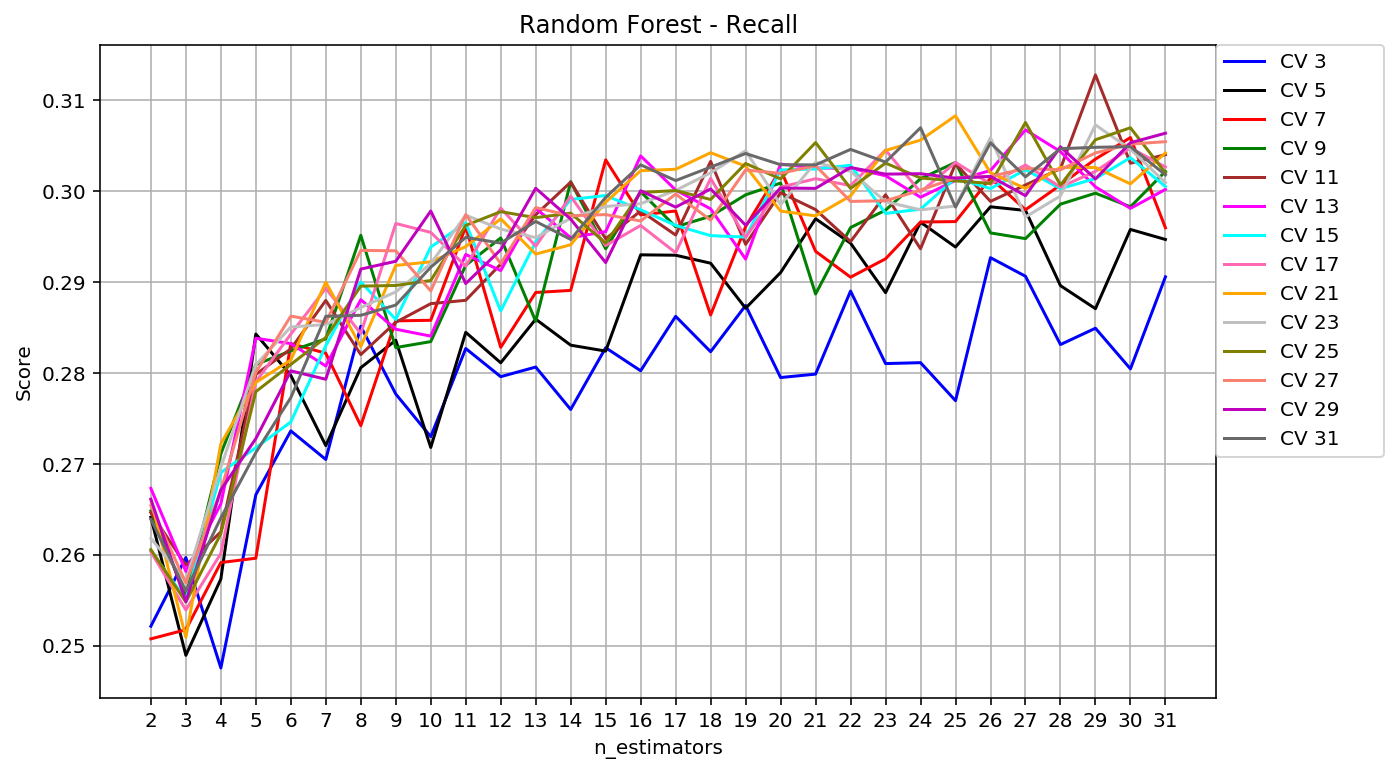

In [87]:
fig, ax = plt.subplots()

c = ["2","3","4","5","6","7","8","9","10","11",
    "12","13","14","15","16","17","18","19","20","21",
    "22","23","24","25","26","27","28","29","30","31"]

ax.plot(c,recall_rf[0], color = 'Blue', label = 'CV 3')
ax.plot(c,recall_rf[1], color = 'Black', label = 'CV 5')
ax.plot(c,recall_rf[2], color = 'Red', label = 'CV 7')
ax.plot(c,recall_rf[3], color = 'Green', label = 'CV 9')
ax.plot(c,recall_rf[4], color = 'Brown', label = 'CV 11')
ax.plot(c,recall_rf[5], color = 'Magenta', label = 'CV 13')
ax.plot(c,recall_rf[6], color = 'cyan', label = 'CV 15')
ax.plot(c,recall_rf[7], color = 'hotpink', label = 'CV 17')
ax.plot(c,recall_rf[8], color = 'orange', label = 'CV 21')
ax.plot(c,recall_rf[9], color = 'silver', label = 'CV 23')
ax.plot(c,recall_rf[10], color = 'olive', label = 'CV 25')
ax.plot(c,recall_rf[11], color = 'salmon', label = 'CV 27')
ax.plot(c,recall_rf[12], color = 'm', label = 'CV 29')
ax.plot(c,recall_rf[13], color = 'dimgray', label = 'CV 31')


plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Random Forest - Recall')


plt.legend(bbox_to_anchor=(1, 0, .15, 1), loc=1,
           mode="expand", borderaxespad=0)

plt.grid()
fig=plt.gcf()
fig.set_size_inches(10,6)

   <a id=6></a>
**<h3>2.4 k-nearest neighbors - Kfold</h3>**

In [11]:
score_mean_knn = []
precision_knn = []
recall_knn = []

a = 3

for d in range(10):

    kfold = KFold(n_splits = a,shuffle=True)
    
    print("cv:", a)
    
    cv_score_mean =[]
    cv_precision_mean = []
    cv_recall_mean = []

    n = 2

    for number in range(5):
        
            knn = KNeighborsClassifier(n_neighbors = n)


            cv_score =[]
            cv_precision = []
            cv_recall = []

            i=1

            for train_index,test_index in kfold.split(X,y):

                xtr,xvl = X[train_index],X[test_index]
                ytr,yvl = y[train_index],y[test_index]

                knn.fit(xtr,ytr)

                score = accuracy_score(yvl,knn.predict(xvl))
                precision = precision_score(yvl, knn.predict(xvl), average = 'macro')
                recall = recall_score(yvl, knn.predict(xvl), average = 'macro')

                cv_score.append(score)
                cv_precision.append(precision)
                cv_recall.append(recall)


                i+=1

           
            n +=1
            
            score_mean = np.mean(cv_score)
            precision_mean = np.mean(cv_precision)
            recall_mean = np.mean(cv_recall)

            cv_score_mean.append(score_mean)
            cv_precision_mean.append(precision_mean)
            cv_recall_mean.append(recall_mean)           
            
    a +=2 
            
    score_mean_knn.append(cv_score_mean)
    precision_knn.append(cv_precision_mean)
    recall_knn.append(cv_recall_mean)

cv: 3
cv: 5
cv: 7
cv: 9
cv: 11
cv: 13
cv: 15
cv: 17
cv: 19
cv: 21


   <a id=7></a>
**<h3>2.5 Support Vector Machines - Kfold</h3>**

In [13]:
cv_score_mean_svm =[]
cv_precision_mean_svm = []
cv_recall_mean_svm = []

n = 3

for a in range(10):
    
        svm = SVC(kernel = 'linear')


        kf = KFold(n_splits=n+2,shuffle=True)

        cv_score =[]
        cv_precision = []
        cv_recall = []
        i=1

        for train_index,test_index in kf.split(X,y):

            xtr,xvl = X[train_index],X[test_index]
            ytr,yvl = y[train_index],y[test_index]

            svm.fit(xtr,ytr)
            score = accuracy_score(yvl,svm.predict(xvl))  
            precision = precision_score(yvl, svm.predict(xvl), average = 'macro')
            recall = recall_score(yvl,svm.predict(xvl), average = 'macro')

            cv_score.append(score)  
            cv_precision.append(precision)
            cv_recall.append(recall)

            i+=1
            
        n +=2 
        
        score_mean = np.mean(cv_score)
        precision_mean = np.mean(cv_precision)
        recall_mean = np.mean(cv_recall)
        
        cv_score_mean_svm.append(score_mean)  
        cv_precision_mean_svm.append(precision_mean)
        cv_recall_mean_svm.append(recall_mean)


KeyboardInterrupt: 

   <a id=8></a>
**<h2>3 Elección del modelos</h2>**

Se ha decidido ver los resultado para DecissionTree, con max_depth =  Max_depth 10 y un Cv5, que es el que mejor resltados tiene. 

In [110]:
kfold = KFold(n_splits = 5,shuffle=True)



cv_score_mean =[]
cv_precision_mean = []
cv_recall_mean = []


tree = DecisionTreeClassifier(criterion = 'entropy',
          max_depth = 10,
          random_state = 0)



cv_score =[]
cv_precision = []
cv_recall = []

i=1

for train_index,test_index in kfold.split(X,y):

    xtr,xvl = X[train_index],X[test_index]
    ytr,yvl = y[train_index],y[test_index]

    tree.fit(xtr,ytr)

    score = accuracy_score(yvl,tree.predict(xvl))
    precision = precision_score(yvl, tree.predict(xvl), average = 'macro')
    recall = recall_score(yvl, tree.predict(xvl), average = 'macro')

    cv_score.append(score)
    cv_precision.append(precision)
    cv_recall.append(recall)


    i+=1


score_mean = np.mean(cv_score)
precision_mean = np.mean(cv_precision)
recall_mean = np.mean(cv_recall)



In [111]:
        print('Resultados finales')
        print(' Accuracy: %2f' % score_mean)
        print(' Precision: %2f' % precision_mean )
        print(' Recall: %2f' % recall_mean)

Resultados finales
 Accuracy: 0.901274
 Precision: 0.511478
 Recall: 0.425433


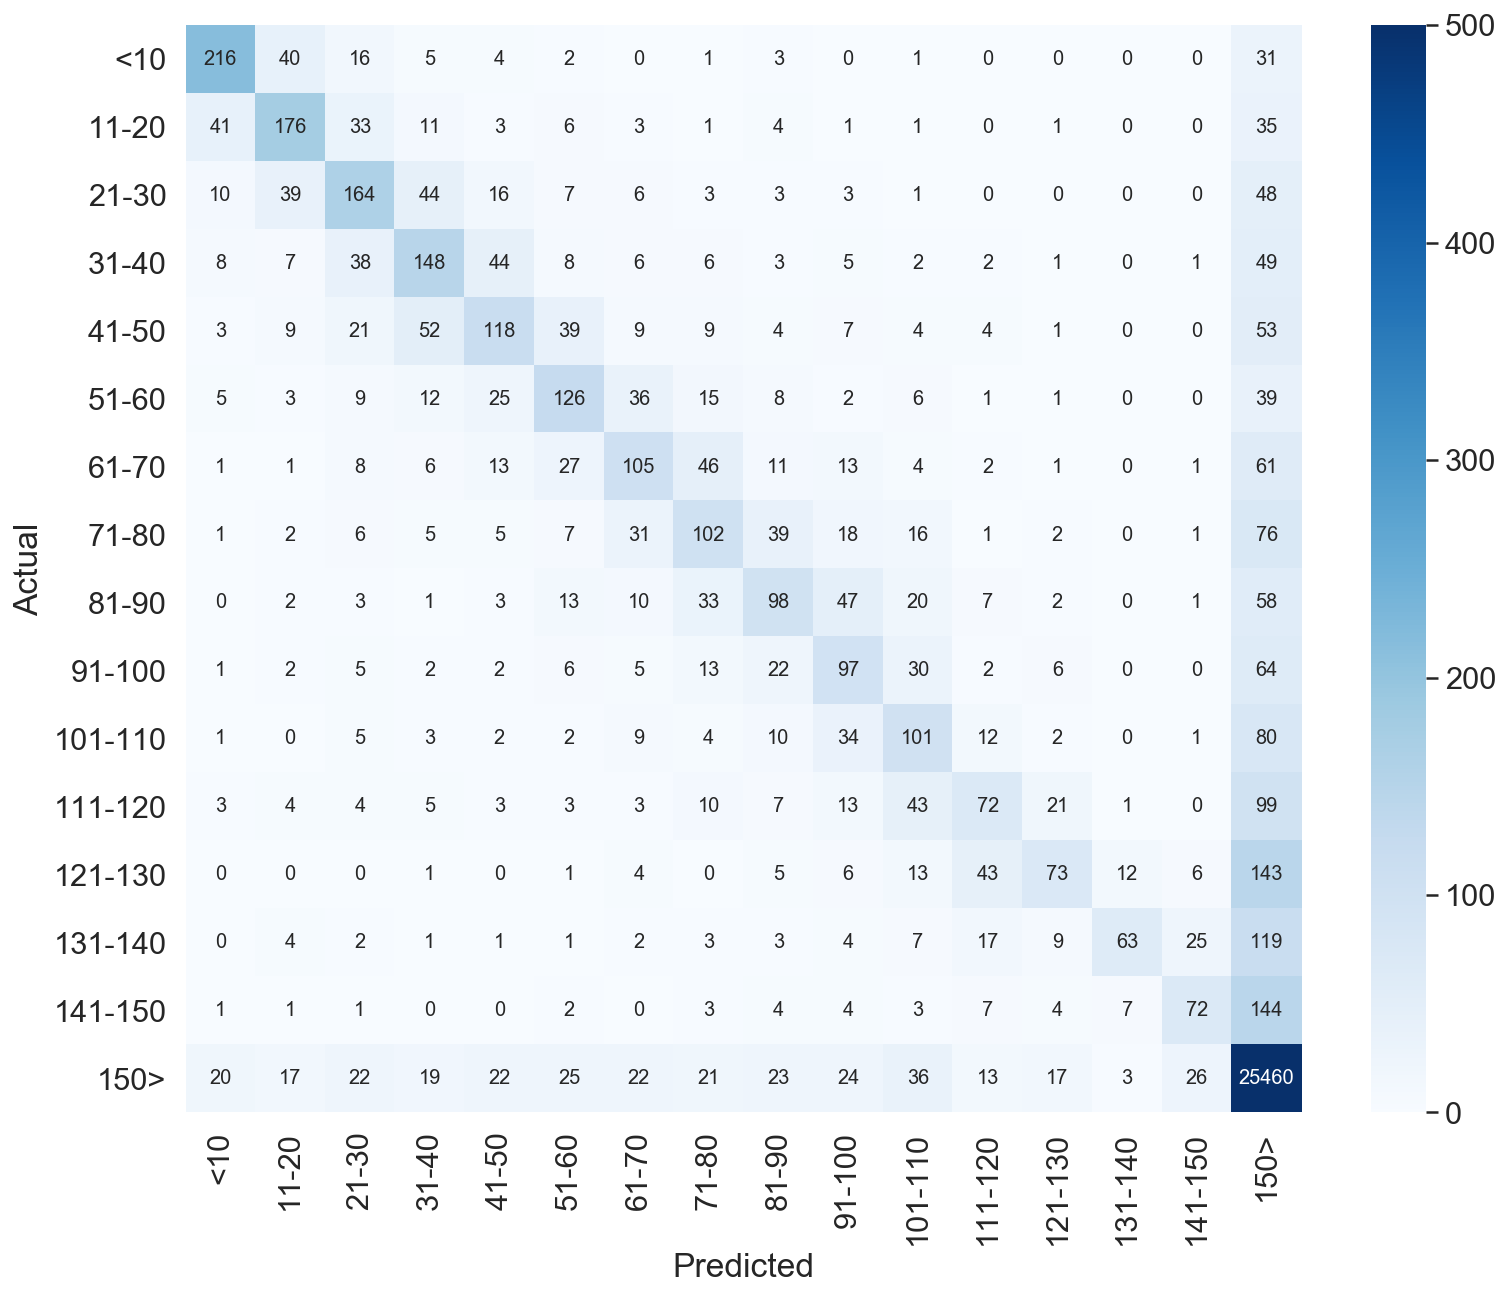

In [112]:
conf_mat = confusion_matrix(yvl, tree.predict(xvl))

df_cm = pd.DataFrame(conf_mat, columns=np.unique(y), index = np.unique(y))

df_cm.rename(index = {10: "<10", 
                 20:"11-20",
                 30:"21-30",
                 40:"31-40",
                 50:"41-50",
                 60:"51-60",
                 70:"61-70",
                 80:"71-80",
                 90:"81-90",
                 100:"91-100",
                 110:"101-110",
                 120:"111-120",
                 130:"121-130",
                 140:"131-140",
                 150:"141-150",
                 200:"150>"  
                }, 
                inplace = True)

df_cm.rename(columns = {10: "<10", 
                 20:"11-20",
                 30:"21-30",
                 40:"31-40",
                 50:"41-50",
                 60:"51-60",
                 70:"61-70",
                 80:"71-80",
                 90:"81-90",
                 100:"91-100",
                 110:"101-110",
                 120:"111-120",
                 130:"121-130",
                 140:"131-140",
                 150:"141-150",
                 200:"150>"  
                }, 
                inplace = True)

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (12.5,10))

sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,fmt = "d",annot_kws={"size": 10}, vmax = 500)
